In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns

## Various D

In [9]:
df = pd.read_csv('Without_spring_d5.csv')
# df2 = df.iloc[[i for i in range(633, 821)]]
df2 = df.iloc[[i for i in range(638,826)]]
df2 = df2.astype(float)
torques = df2['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

19.176700087842843

In [10]:
df3 = pd.read_csv('Without_spring_d10.csv')
df4 = df3.iloc[[i for i in range(633,821)]]
df4 = df4.astype(float)
torques = df4['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

18.787405799808997

In [11]:
df5 = pd.read_csv('Without_spring_d20.csv')
df6 = df5.iloc[[i for i in range(631,819)]]
df6 = df6.astype(float)
torques = df6['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

17.906329904026105

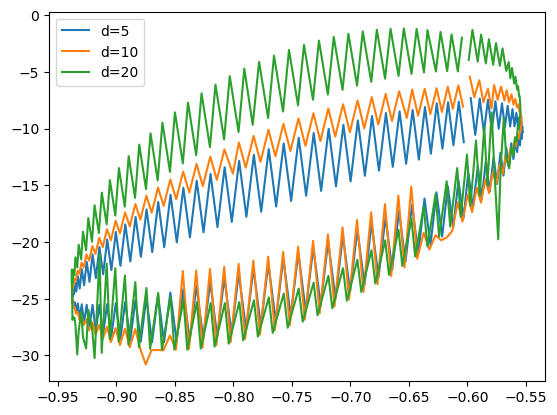

In [13]:
plt.plot(df2['Angle'].to_numpy(), df2['Torque'].to_numpy(), label = 'd=5')
plt.plot(df4['Angle'].to_numpy(), df4['Torque'].to_numpy(), label = 'd=10')
plt.plot(df6['Angle'].to_numpy(), df6['Torque'].to_numpy(), label = 'd=20')
plt.legend()

In [ ]:
# angle2 = df4['Angle']
# joint_torques2 = df4['Torque'] * (-1)

# mu = 5.5
# optimal_angle = sum((angle - torque/mu) for angle, torque in zip(angle2, joint_torques2))/len(angle2)
# optimal_angle

## Notebook

In [85]:
df = pd.read_csv('Without_spring_hip7.csv')
df2 = df.iloc[[i for i in range(729, )]]
df2 = df2.astype(float)
torques = df2['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

13.354927304039657

In [82]:
df3 = pd.read_csv('With_spring_hip1.csv')
df4 = df3.iloc[[i for i in range(573,761)]]
df4 = df4.astype(float)
torques = df4['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

1.1765690129240847

In [75]:
def calc_optimal_mu_alpha_0(alphas, taus):
    N = len(alphas)

    stau = sum(taus)
    salpha = sum(alphas)
    salpha2 = sum([alpha**2 for alpha in alphas])
    salphatau = sum([alpha * tau for alpha, tau in zip(alphas, taus)])
    
    mu = (salpha * stau - N * salphatau) / (salpha**2 - N * salpha2)
    alpha_0 = (stau * salpha2 - salphatau * salpha) / (salpha * stau - N * salphatau)
    
    return mu, alpha_0

In [76]:
mu, alpha_0 = calc_optimal_mu_alpha_0(df6['Angle'], df6['Torque'] * (-1))
print(mu)
print(alpha_0)

8.483935995350961
-2.28044808804402


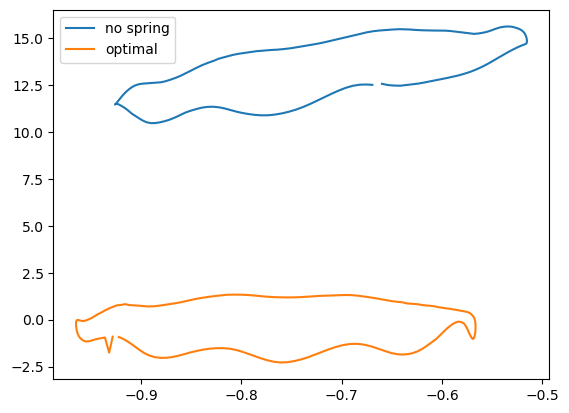

In [86]:
plt.plot(df2['Angle'].to_numpy(), -df2['Torque'].to_numpy(), label = 'no spring')
plt.plot(df4['Angle'].to_numpy(), -df4['Torque'].to_numpy(), label = 'optimal')


plt.legend()

## Trajectory

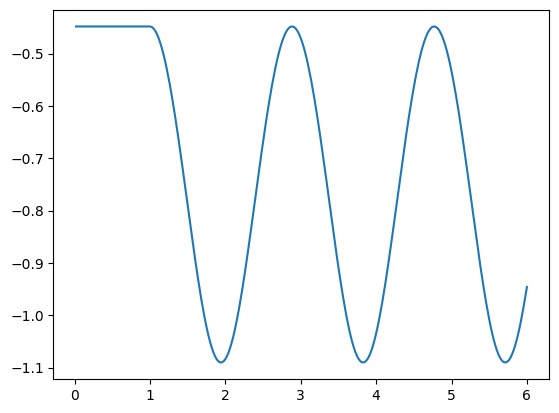

In [88]:
h0 = -0.2
t0 = 1
a0 = 0.08
t = 0
T = 0.3
high = []
times = []
angles = []
l = 0.27
for i in range(300):
    t+=0.02
    if t<t0:
        h = h0 + a0
    else:
        h = h0 - a0* np.sin((t- t0)/T - np.pi/2)
    angle = 2 * np.arcsin(h/(2*l))
    times.append(t)
    high.append(h)
    angles.append(angle)
plt.plot(times, angles)


## PC with optimal spring

In [13]:
df = pd.read_csv('With_spring_d20.csv')
df2 = df.iloc[[i for i in range(645,833)]]
df2 = df2.astype(float)
df2['Torque'] = df2['Torque'] * (-1)/4

torques = df2['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))


2.7398167856904316

In [14]:
df3 = pd.read_csv('Without_spring_d5.csv')
df4 = df3.iloc[[i for i in range(638,826)]]
df4 = df4.astype(float)
torques = df4['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

19.176700087842843

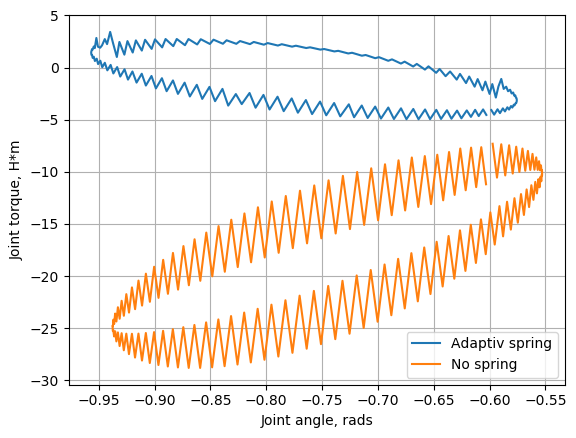

In [15]:
plt.plot(df2['Angle'].to_numpy(), df2['Torque'].to_numpy(), label = 'Adaptiv spring')
plt.plot(df4['Angle'].to_numpy(), df4['Torque'].to_numpy(), label = 'No spring')
plt.xlabel('Joint angle, rads')
plt.ylabel('Joint torque, H*m')
plt.legend()
plt.grid()

## Notebook with optimal spring

In [17]:
df = pd.read_csv('Without_spring_nb_d10.csv')
# df2 = df.iloc[[i for i in range(633, 821)]]
df2 = df.iloc[[i for i in range(567, 755)]]
df2 = df2.astype(float)
torques = df2['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

19.34860636908538

In [19]:
df3 = pd.read_csv('With_spring_nb.csv')
df4 = df3.iloc[[i for i in range(580,768)]]
df4 = df4.astype(float)
torques = df4['Torque'].to_list()
np.sqrt(np.mean([i*i for i in torques]))

20.16256021186256

In [18]:
angle2 = df2['Angle']
joint_torques2 = df2['Torque'] * (-1)

mu = 5.5
optimal_angle = sum((angle - torque/mu) for angle, torque in zip(angle2, joint_torques2))/len(angle2)
optimal_angle

-4.009166788330958

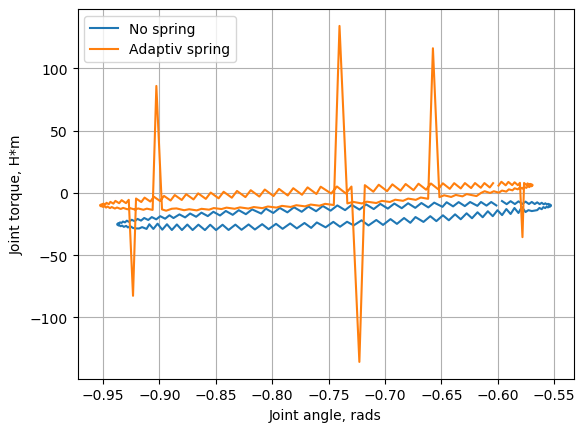

In [20]:
plt.plot(df2['Angle'].to_numpy(), df2['Torque'].to_numpy(), label = 'No spring')
plt.plot(df4['Angle'].to_numpy(), df4['Torque'].to_numpy(), label = 'Adaptiv spring')
plt.xlabel('Joint angle, rads')
plt.ylabel('Joint torque, H*m')
plt.legend()
plt.grid()